In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

raw_data = pd.read_csv('../data/raw/water_quality.csv')


print(raw_data.isnull().sum())

raw_data['pH'] = raw_data['pH'].fillna(raw_data['pH'].median())
raw_data['Temperature'] = raw_data['Temperature'].fillna(raw_data['Temperature'].median())
raw_data['Dissolved Oxygen'] = raw_data['Dissolved Oxygen'].fillna(raw_data['Dissolved Oxygen'].median())
raw_data['Electrical Conductivity'] = raw_data['Electrical Conductivity'].fillna(raw_data['Electrical Conductivity'].median())
raw_data['Turbidity'] = raw_data['Turbidity'].fillna(raw_data['Turbidity'].median())
raw_data['Nitrogen'] = raw_data['Nitrogen'].fillna(raw_data['Nitrogen'].median())
raw_data['Phosphorus'] = raw_data['Phosphorus'].fillna(raw_data['Phosphorus'].median())
raw_data['Potassium'] = raw_data['Potassium'].fillna(raw_data['Potassium'].median())
raw_data['Water Hardness'] = raw_data['Water Hardness'].fillna(raw_data['Water Hardness'].median())

# Remove Duplicates
raw_data = raw_data.drop_duplicates()

scaler = StandardScaler()

# Scale numerical columns
scaled_features = scaler.fit_transform(raw_data[['pH', 'Temperature', 'Dissolved Oxygen', 
                                                 'Electrical Conductivity', 'Turbidity', 
                                                 'Nitrogen', 'Phosphorus', 'Potassium', 
                                                 'Water Hardness']])

# Convert scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=['pH', 'Temperature', 'Dissolved Oxygen', 
                                                     'Electrical Conductivity', 'Turbidity', 
                                                     'Nitrogen', 'Phosphorus', 'Potassium', 
                                                     'Water Hardness'])

label_encoder = LabelEncoder()
scaled_data['Label'] = label_encoder.fit_transform(raw_data['Label'])

#Save the Cleaned and Processed Data
scaled_data.to_csv('../data/processed/water_quality_dataset_cleaned.csv', index=False)

print("Data cleaning completed and saved in 'processed' folder.")


pH                         0
Temperature                0
Dissolved Oxygen           0
Electrical Conductivity    0
Turbidity                  0
Nitrogen                   0
Phosphorus                 0
Potassium                  0
Water Hardness             0
Label                      0
dtype: int64
Data cleaning completed and saved in 'processed' folder.


In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from sklearn.model_selection import GridSearchCV


In [203]:
data = pd.read_csv("../data/processed/water_quality_dataset_cleaned.csv")

# Display the first few rows 
data.head()

# Check summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

# Check data types
data.dtypes


pH                         float64
Temperature                float64
Dissolved Oxygen           float64
Electrical Conductivity    float64
Turbidity                  float64
Nitrogen                   float64
Phosphorus                 float64
Potassium                  float64
Water Hardness             float64
Label                        int64
dtype: object

In [204]:
missing_data = data.isnull().sum()
print(missing_data)

data_cleaned = data.dropna()

# Verify no missing values
print(data_cleaned.isnull().sum())  # Should show 0


pH                         0
Temperature                0
Dissolved Oxygen           0
Electrical Conductivity    0
Turbidity                  0
Nitrogen                   0
Phosphorus                 0
Potassium                  0
Water Hardness             0
Label                      0
dtype: int64
pH                         0
Temperature                0
Dissolved Oxygen           0
Electrical Conductivity    0
Turbidity                  0
Nitrogen                   0
Phosphorus                 0
Potassium                  0
Water Hardness             0
Label                      0
dtype: int64


In [216]:
# Remove duplicates 
data_cleaned = data_cleaned.drop_duplicates()

# Verify no duplicates remain
print(f"Duplicates removed: {data_cleaned.duplicated().sum()}")


Duplicates removed: 0


In [217]:
# Calculate the Z-scores to detect outliers 
from scipy import stats

z_scores = np.abs(stats.zscore(data_cleaned.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)  # Find rows with outliers
data_cleaned = data_cleaned[~outliers]  # Remove outliers


In [218]:
# Separate the features (X) and target variable (y)
X = data_cleaned.drop('Label', axis=1)  # Drop the 'Label' column 
y = data_cleaned['Label']  

# Check the shape of the data 
print(X.shape, y.shape)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


(11000, 9) (11000,)


In [231]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Print the sizes of the training and testing sets
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")


Training Set Size: 9900
Testing Set Size: 1100


[LightGBM] [Info] Number of positive: 5126, number of negative: 4774
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 9900, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517778 -> initscore=0.071141
[LightGBM] [Info] Start training from score 0.071141
Model Accuracy: 55.64%


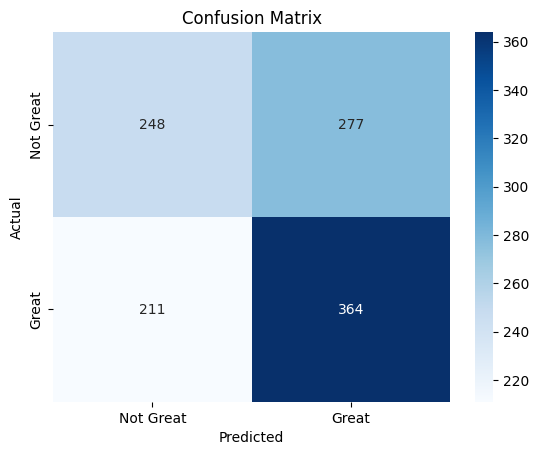

              precision    recall  f1-score   support

           0       0.54      0.47      0.50       525
           1       0.57      0.63      0.60       575

    accuracy                           0.56      1100
   macro avg       0.55      0.55      0.55      1100
weighted avg       0.55      0.56      0.55      1100



In [221]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the LightGBM model
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Great", "Great"], yticklabels=["Not Great", "Great"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [223]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[248 277]
 [211 364]]
              precision    recall  f1-score   support

           0       0.54      0.47      0.50       525
           1       0.57      0.63      0.60       575

    accuracy                           0.56      1100
   macro avg       0.55      0.55      0.55      1100
weighted avg       0.55      0.56      0.55      1100



In [226]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
Test Accuracy: 55.64%
Confusion Matrix:
[[257 268]
 [220 355]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       525
           1       0.57      0.62      0.59       575

    accuracy                           0.56      1100
   macro avg       0.55      0.55      0.55      1100
weighted avg       0.56      0.56      0.55      1100



In [227]:
import pandas as pd

# Get feature importance from the best model
feature_importances = best_model.feature_importances_
features = X.columns  # Assuming X is a DataFrame with feature names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                   Feature  Importance
2         Dissolved Oxygen        1104
8           Water Hardness        1078
0                       pH         945
3  Electrical Conductivity         859
5                 Nitrogen         835
7                Potassium         731
1              Temperature         684
4                Turbidity         599
6               Phosphorus         515


In [228]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best model
cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 4560, number of negative: 4240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 8800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518182 -> initscore=0.0

[LightGBM] [Info] Number of positive: 5126, number of negative: 4774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 9900, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517778 -> initscore=0.071141
[LightGBM] [Info] Start training from score 0.071141
Model Accuracy: 55.64%


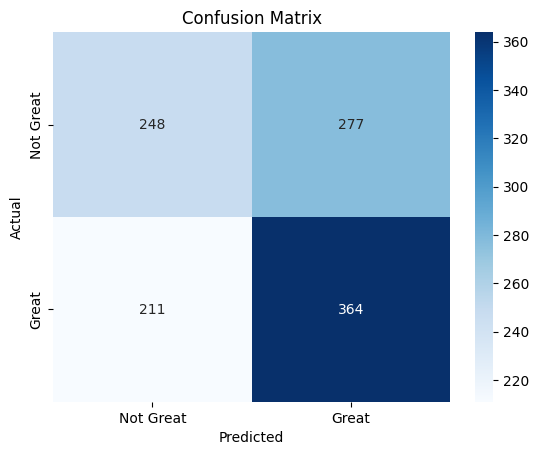

              precision    recall  f1-score   support

           0       0.54      0.47      0.50       525
           1       0.57      0.63      0.60       575

    accuracy                           0.56      1100
   macro avg       0.55      0.55      0.55      1100
weighted avg       0.55      0.56      0.55      1100



In [229]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your feature set X (including pH, temperature, etc.) and label y (1 for 'great' and 0 for 'not great')

# Split the data (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Initialize the LightGBM model
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Great", "Great"], yticklabels=["Not Great", "Great"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [233]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Create the model
model = LGBMClassifier()

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth': [10, 15, 20],
    'num_leaves': [50, 100, 200],
    'n_estimators': [50, 100, 150],
    'feature_fraction': [0.7, 0.8, 0.9],
    'min_data_in_leaf': [10, 20, 30]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 3417, number of negative: 3183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 6600, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517727 -> initscore=0.070939
[LightGBM]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from scipy.stats import uniform

# Define the LightGBM model
model = lgb.LGBMClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': uniform(0.01, 0.1),
    'num_leaves': [31, 50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_data_in_leaf': [10, 20, 50],
    'feature_fraction': uniform(0.7, 0.3)
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1, verbose=2, scoring='accuracy')
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")


In [232]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")


[LightGBM] [Info] Number of positive: 4100, number of negative: 3820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517677 -> initscore=0.070737
[LightGBM] [Info] Start training from score 0.070737
[LightGBM] [Info] Number of positive: 4101, number of negative: 3819
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517803 -> initscore=0.071242
[LightGBM] [Info] Start training from score 0.071242
[LightGBM] [Info] Number o

In [234]:
import joblib

# Save the trained model
joblib.dump(model, '../models/trained_model/water_quality_modelv1.pkl')


['../models/trained_model/water_quality_modelv1.pkl']